# 线性模型
---
线性模型是在实践中广泛使用的一类模型。线性模型利用输入特征的线性函数（linear function）进行预测，稍后会对此进行解释。

## 用于回归的线性模型
---
对于回归问题，线性模型预测的一般公式如下：

ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b

这里x[0]到x[p]表示单个数据点的特征，w和b是学习模型的参数，ŷ是模型的预测结果。

对于单一特征的数据集，公式如下：

ŷ = w[0] * x[0] + b

w[0]是斜率，b是y轴偏移。对于有更多特征的数据集，w包含沿每个特征坐标轴的斜率。或者，你也可以将预测的响应值看作输入特征的加权求和，权重由w的元素给出（可以取负值）。

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style = "white")

w[0]: 0.393906  b: -0.031804


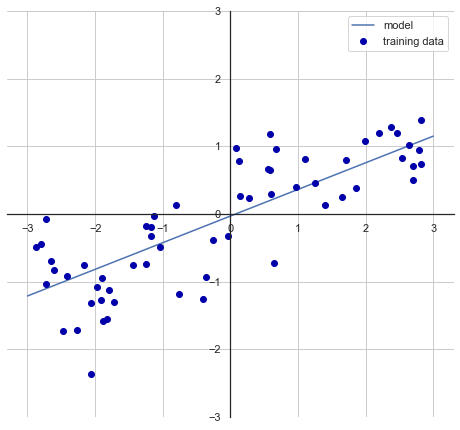

In [3]:
mglearn.plots.plot_linear_regression_wave()

从w[0]可以看出，斜率约为0.39，在图像中也可以直观地确认这一点。截距是指预测直线与y轴的交点：比0略小，也可以在图像中确认。用于回归的线性模型可以表示为这样的回归模型：对单一特征的预测结果是一条直线，两个特征时是一个平面，或者在更高维度（即更多特征）时是一个超平面。

如果将直线的预测结果与其它算法，如KNeighborsRegressor的预测结果进行比较，你会发现直线的预测能力非常受限。似乎数据的所有细节都丢失了。从某种意义上来说，这种说法是正确的。假设目标y是特征的线性组合，这是一个非常强的（也有点不现实的）假设。但观察一维数据得出的观点有些片面。对于有多个特征的数据集而言，线性模型可以非常强大。特别地，如果特征数量大于训练数据点的数量，任何目标y都可以（在训练集上）用线性函数完美拟合。有许多不同的线性回归模型。这些模型之间的区别在于如何从训练数据中学习参数w和b，以及如何控制模型复杂度。

## 线性回归（又名普通最小二乘法）
---
线性回归，或者普通最小二乘法(ordinary least squares，OLS)，是回归问题最简单也最经典的线性方法。线性回归寻找参数w和b，使得对训练集的预测值与真实的回归目标值y之间的均方误差最小。均方误差(mean squared error)是预测值与真实值之差的平方和除以样本数。线性回归没有参数，这是一个优点，但也因此无法控制模型的复杂度。

In [6]:
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

* “斜率”参数(w，也叫作权重或系数)被保存在coef_属性中
* 偏移或截距(b)被保存在intercept_属性中

In [7]:
print('lr.coef_:{}'.format(lr.coef_))
print('lr.intercept_:{}'.format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


##### 注意！！！sklearn总是将从训练数据中得出的值保存在以下划线结尾的属性中。这是为了将其与用户设置的参数区分开。

intercept_属性是一个浮点数，而coef_属性是一个NumPy数组，每个元素对应一个输入特征。上述wave数据集中只有一个输入特征，所以lr.coef_中只有一个元素。

In [8]:
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

Training set score:0.67
Test set score:0.66


R^2约为0.66，这个结果不是很好，但我们可以看到，训练集和测试集上的分数非常接近。这说明可能存在欠拟合，而不是过拟合。对于这个一维数据集来说，过拟合的风险很小，因为模型非常简单（或受限）。然而，对于更高维的数据集（即有大量特征的数据集），线性模型将变得更加强大，过拟合的可能性也会变大。

将LinearRegression在更复杂的数据集，如波士顿房价数据集拟合的表现，这个数据集有506个样本和105个导出特征。

In [9]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [11]:
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

Training set score:0.95
Test set score:0.61


训练集和测试集之间的性能差异是过拟合的明显标志，因此我们应该试图找到一个可以控制复杂度的模型。标准线性回归最常用的替代方法之一就是岭回归（ridge regression）。

## 岭回归
---
岭回归是一种用于回归的线性模型，它的预测公式与普通最小二乘法相同。但在岭回归中，对系数（w）的选择不仅要在训练数据上得到好的预测结果，而且还要拟合附加约束。我们还希望系数尽量小。换句话说，w的所有元素都应接近于0。直观上来看，这意味着每个特征对输出的影响应尽可能小（即斜率很小），同时仍给出很好的预测结果。这种约束是所谓正则化（regularization）的一个例子。正则化是指对模型做显性约束，以避免过拟合。岭回归用到的这种被称为L2正则化。

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test, y_test)))

Training set score:0.89
Test set score:0.75


可以看出，Ridge在训练集上的分数要低于LinearRegression，但在测试集上的分数更高。这和我们的预期一致。线性回归对数据存在过拟合。Ridge是一种约束更强的模型，所以更不容易过拟合。复杂度更小的模型意味着在训练集上的性能更差，但泛化性能更好。由于我们只对泛化性能感兴趣，所以应该选择Ridge模型而不是LinearRegression模型。

Ridge模型在模型的简单性（系数都接近于0）与训练集性能之间做出权衡。简单性和训练集性能二者对于模型的重要程度可以由用户通过设置alpha参数来指定。上述例子，我们用的是默认参数alpha=1.0。但没有理由认为这会给出最佳权衡。alpha的最佳设定值取决于用到的具体数据集。增大alpha会使得系数更加趋向于0，从而降低训练集性能，但可能会提高泛化性能。

增大 alpha 会使得系数更加趋向于0，从而降低训练集性能，但可能会提高泛化性能

In [13]:
ridge1 = Ridge(alpha = 0.1).fit(X_train, y_train)

print('Training set score:{:.2f}'.format(ridge1.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge1.score(X_test, y_test)))

Training set score:0.93
Test set score:0.77


In [14]:
ridge2 = Ridge(alpha = 0.01).fit(X_train, y_train)

print('Training set score:{:.2f}'.format(ridge2.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge2.score(X_test, y_test)))

Training set score:0.94
Test set score:0.70


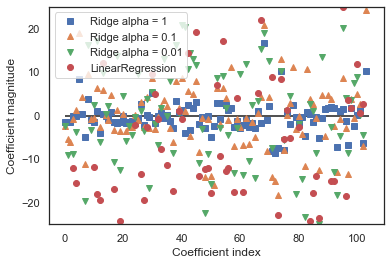

In [15]:
plt.plot(ridge.coef_, 's', label = 'Ridge alpha = 1')
plt.plot(ridge1.coef_, '^', label = 'Ridge alpha = 0.1')
plt.plot(ridge2.coef_, 'v', label = 'Ridge alpha = 0.01')
plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

对波士顿房价数据集做二次抽样，并在数据量逐渐增加的子数据集上分别对LinearRegression和Ridge(alpha=1)两个模型进行评估（将模型性能作为数据集大小的函数进行绘图，这样的图像叫作学习曲线）

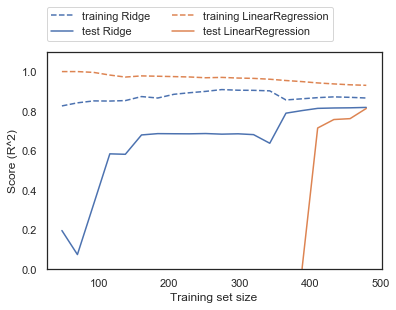

In [16]:
mglearn.plots.plot_ridge_n_samples()

正如所预计的那样，无论是岭回归还是线性回归，所有数据集大小对应的训练分数都要高于测试分数。由于岭回归是正则化的，因此它的训练分数要整体低于线性回归的训练分数。但岭回归的测试分数要更高，特别是对较小的子数据集。如果少于400个数据点，线性回归学不到任何内容。随着模型可用的数据越来越多，两个模型的性能都在提升，最终线性回归的性能追上了岭回归。

注意！！！如果有足够多的训练数据，正则化变得不那么重要，并且岭回归和线性回归将具有相同的性能（在上述例子中，二者相同恰好发生在整个数据集的情况下，这只是一个巧合）。上图中还有一个有趣之处，就是线性回归的训练性能在下降。如果添加更多数据，模型将更加难以过拟合或记住所有的数据。

## Lasso回归
---
除了Ridge，还有一种正则化的线性回归是Lasso。与岭回归相同，使用lasso也是约束系数使其接近于0，但用到的方法不同，叫作L1正则化。L1正则化的结果是，使用lasso时某些系数刚好为0。这说明某些特征被模型完全忽略。这可以看作是一种自动化的特征选择。某些系数刚好为0，这样模型更容易解释，也可以呈现模型最重要的特征。

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print('Training set score:{:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso.coef_ != 0)))

Training set score:0.29
Test set score:0.21
Number of features used:4


注意！！！增大max_iter的值，否则模型会警告说应该增大max_iter

In [25]:
lasso1 = Lasso(alpha = 0.01, max_iter = 10000).fit(X_train, y_train)

print('Training set score:{:.2f}'.format(lasso1.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso1.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso1.coef_ != 0)))

Training set score:0.90
Test set score:0.77
Number of features used:33


In [30]:
lasso2 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)

print('Training set score:{:.2f}'.format(lasso2.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso2.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso2.coef_ != 0)))

Training set score:0.95
Test set score:0.64
Number of features used:96


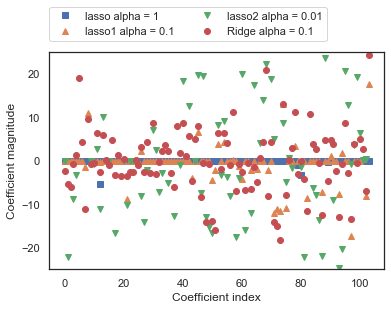

In [31]:
plt.plot(lasso.coef_, 's', label = 'lasso alpha = 1')
plt.plot(lasso1.coef_, '^', label = 'lasso1 alpha = 0.1')
plt.plot(lasso2.coef_, 'v', label = 'lasso2 alpha = 0.01')
plt.plot(ridge1.coef_, 'o', label = 'Ridge alpha = 0.1')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0, 1.05))

在实践中，在两个模型中一般首选岭回归。但如果特征很多，你认为只有其中几个是重要的，那么选择Lasso可能更好。同样，如果你想要一个容易解释的模型，Lasso可以给出更容易理解的模型，因为它只选择了一部分输入特征。还有弹性网络模型，提供了ElasticNet类，其结合了Lasso和Ridge的惩罚项。在实践中，这种结合的效果最好，不过代价是要调节两个参数：一个用于L1正则化，一个用于L2正则化。